# **Eksplorasi, Persiapan Data, dan Classification**

# **Penjelasan Masalah**

Masalah yang ingin diselesaikan disini adalah algoritma classification mampu melakukan klasifikasi terhadap data pelanggan yang nantinya akan menghasilkan prediksi terhadap data pelanggan sehingga kita dapat mengetahui mana pelanggan yang tertarik untuk membeli kendaraan tersebut.

 ## **Muat File Data**

In [1]:
#import all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from scipy import stats
import sklearn
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

In [2]:
#Reading the dataset in a dataframe using Pandas
df_train = pd.read_csv("kendaraan_train.csv")

df_train.head(10)  #Print first ten observations of train data

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
5,6,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
6,7,Wanita,33.0,1.0,8.0,0.0,NaN,Pernah,32435.0,124.0,215.0,1
7,8,Pria,23.0,NaN,28.0,1.0,< 1 Tahun,Tidak,26869.0,152.0,222.0,0
8,9,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0
9,10,NaN,54.0,1.0,29.0,0.0,> 2 Tahun,Pernah,88883.0,124.0,28.0,1


In [3]:
#Reading the dataset in a dataframe using Pandas
df_test = pd.read_csv('kendaraan_test.csv')

df_test.head(10)  #Print first ten observations of test data

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
5,Pria,26,1,28,1,< 1 Tahun,Tidak,42721,152,198,0
6,Wanita,24,1,28,1,< 1 Tahun,Tidak,65801,152,160,0
7,Wanita,40,1,28,0,1-2 Tahun,Pernah,30981,26,79,0
8,Pria,23,1,15,1,< 1 Tahun,Tidak,32365,152,219,0
9,Wanita,43,1,28,0,1-2 Tahun,Pernah,65380,25,41,1


## **Eksplorasi Data**

Untuk ikhtisar singkat, kita dapat menggunakan metode dan atribut DataFrame berikut:

In [4]:
df_train.head() # show first 5 rows

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [5]:
df_train.tail() # last 5 rows

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0
285830,285831,Pria,45.0,1.0,28.0,0.0,1-2 Tahun,Pernah,36480.0,26.0,44.0,0


In [6]:
df_train.columns # list all column names

Index(['id', 'Jenis_Kelamin', 'Umur', 'SIM', 'Kode_Daerah', 'Sudah_Asuransi',
       'Umur_Kendaraan', 'Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan',
       'Lama_Berlangganan', 'Tertarik'],
      dtype='object')

- SIM	--> 0 : Tidak punya SIM 1 : Punya SIM
- Kode_Daerah --> Kode area tempat tinggal pelanggan
- Sudah_Asuransi --> 1 : Pelanggan sudah memiliki asuransi kendaraan, 0 : Pelanggan belum memiliki asuransi kendaraan
- Umur_Kendaraan --> Umur kendaraan
- Kendaraan_Rusak --> 1 : Kendaraan pernah rusak sebelumnya. 0 : Kendaraan belum pernah rusak.
- Premi --> Jumlah premi yang harus dibayarkan per tahun.
- Kanal_Penjualan --> Kode kanal untuk menghubungi pelanggan (email, telpon, dll)
- Lama_Berlangganan	--> Sudah berapa lama pelanggan menjadi klien perusahaan

In [7]:
df_train.shape # get number of rows and columns

(285831, 12)

In [8]:
df_train.info() # additional info about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [9]:
df_train.describe() # statistical description, only for numeric values

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [10]:
df_train.value_counts(dropna=False) # count unique values

id      Jenis_Kelamin  Umur  SIM  Kode_Daerah  Sudah_Asuransi  Umur_Kendaraan  Kendaraan_Rusak  Premi    Kanal_Penjualan  Lama_Berlangganan  Tertarik
1       Wanita         30.0  1.0  33.0         1.0             < 1 Tahun       Tidak            28029.0  152.0            97.0               0           1
190553  Wanita         29.0  1.0  28.0         1.0             < 1 Tahun       Tidak            44696.0  152.0            NaN                0           1
190559  Wanita         21.0  1.0  10.0         1.0             NaN             Tidak            37287.0  152.0            116.0              0           1
190558  NaN            29.0  1.0  35.0         1.0             < 1 Tahun       Tidak            28938.0  152.0            73.0               0           1
190557  Wanita         49.0  1.0  3.0          0.0             NaN             NaN              29082.0  124.0            193.0              0           1
                                                                           

### **1. Mengurutkan data**

Berdasarkan Premi terbesar

In [11]:
df_train.sort_values('Premi',ascending=False).head(10) # Sort the Data frame based on Premi in ascending value and print first 10 observation.

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
139054,139055,Wanita,53.0,1.0,28.0,1.0,1-2 Tahun,Tidak,540165.0,26.0,134.0,0
85234,85235,Pria,47.0,1.0,28.0,0.0,1-2 Tahun,Pernah,540165.0,42.0,NaN,0
279444,279445,Wanita,50.0,1.0,46.0,1.0,1-2 Tahun,NaN,508073.0,26.0,192.0,0
243598,243599,Pria,40.0,1.0,28.0,0.0,1-2 Tahun,Pernah,489663.0,122.0,NaN,1
21500,21501,Pria,50.0,1.0,28.0,0.0,1-2 Tahun,Pernah,472042.0,124.0,14.0,1
15445,15446,Pria,22.0,1.0,28.0,0.0,1-2 Tahun,Pernah,472042.0,163.0,114.0,0
216816,216817,Pria,71.0,1.0,28.0,0.0,> 2 Tahun,Pernah,448156.0,122.0,135.0,0
191272,191273,Wanita,49.0,1.0,28.0,0.0,1-2 Tahun,Pernah,402863.0,122.0,218.0,0
236722,236723,Pria,41.0,1.0,NaN,1.0,NaN,Tidak,402097.0,26.0,106.0,0
9880,9881,Wanita,54.0,1.0,7.0,1.0,1-2 Tahun,Tidak,399010.0,26.0,152.0,0


Berdasarkan Lama berlangganan terbesar

In [12]:
df_train.sort_values('Lama_Berlangganan', ascending=False).head(10) #Sort the Data frame based on Lama_Berlangganan in ascending value and print first 10 observation.

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
249862,249863,Wanita,25.0,1.0,7.0,1.0,< 1 Tahun,Tidak,50377.0,NaN,299.0,0
139005,139006,Wanita,29.0,1.0,50.0,0.0,< 1 Tahun,Tidak,32239.0,160.0,299.0,0
172191,172192,Pria,22.0,1.0,8.0,1.0,< 1 Tahun,Tidak,37979.0,160.0,299.0,0
220637,220638,Pria,26.0,1.0,36.0,0.0,< 1 Tahun,Tidak,38937.0,152.0,299.0,0
162824,162825,Pria,25.0,1.0,19.0,0.0,< 1 Tahun,Pernah,2630.0,160.0,299.0,0
123492,123493,Pria,56.0,1.0,27.0,0.0,1-2 Tahun,NaN,27553.0,26.0,299.0,1
53451,53452,Pria,46.0,1.0,41.0,0.0,1-2 Tahun,Pernah,33334.0,124.0,299.0,0
272590,272591,Wanita,21.0,1.0,39.0,NaN,< 1 Tahun,Pernah,38499.0,152.0,299.0,0
71453,71454,Pria,32.0,1.0,28.0,1.0,NaN,Tidak,72115.0,152.0,299.0,0
247844,247845,Wanita,25.0,1.0,29.0,1.0,< 1 Tahun,Tidak,32733.0,152.0,299.0,0


### **2. Membuat Plots**

#### A. Histogram

Berdasarkan Umur

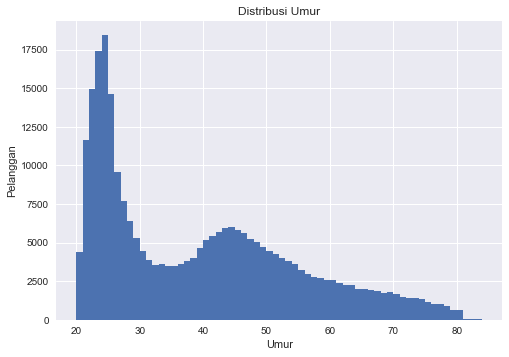

In [13]:
#Plots in matplotlib reside within a figure object, use plt.figure to create new figure
fig=plt.figure()
#Create 3 subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)

#Plot Histogram by age
#Variable
ax.hist(df_train['Umur'],bins=range(20, 85))
#Labels and Tit
plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Pelanggan')
plt.show()

Berdasarkan Premi

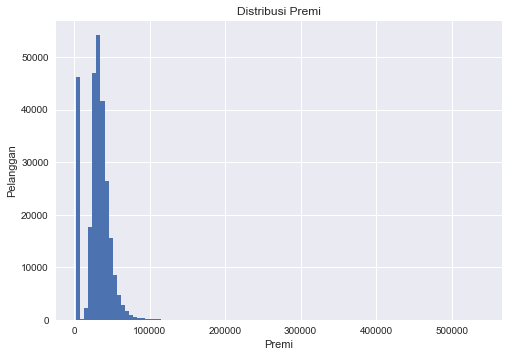

In [14]:
#Plot Histogram by Premi
#Plots in matplotlib reside within a figure object, use plt.figure to create new figure
fig=plt.figure()
#Create 3 subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)

#Variable
ax.hist(df_train['Premi'],bins=100)
#Labels and Tit
plt.title('Distribusi Premi')
plt.xlabel('Premi')
plt.ylabel('Pelanggan')
plt.show()

Berdasarkan Lama Berlangganan

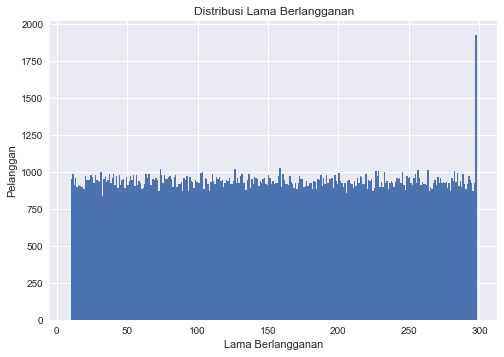

In [15]:
#Plot Histogram by Lama_Berlangganan
#Plots in matplotlib reside within a figure object, use plt.figure to create new figure
fig=plt.figure()
#Create 3 subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)

#Variable
ax.hist(df_train['Lama_Berlangganan'], bins=range(10, 299))
#Labels and Tit
plt.title('Distribusi Lama Berlangganan')
plt.xlabel('Lama Berlangganan')
plt.ylabel('Pelanggan')
plt.show()

Berdasarkan Kanal Penjualan

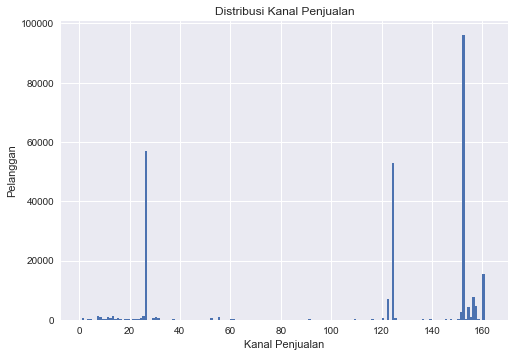

In [16]:
#Plot Histogram by Kanal Penjualan
#Plots in matplotlib reside within a figure object, use plt.figure to create new figure
fig=plt.figure()
#Create 3 subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)

#Variable 
ax.hist(df_train['Kanal_Penjualan'],bins=range(1, 163))
#Labels and Tit
plt.title('Distribusi Kanal Penjualan')
plt.xlabel('Kanal Penjualan')
plt.ylabel('Pelanggan')
plt.show()

#### B. Scatter Plot

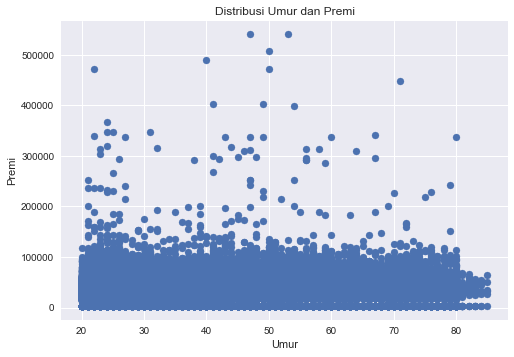

In [18]:
# Scatter Plot based on Age and premi
#Plots in matplotlib reside within a figure object, use plt.figure to create new figure 
fig=plt.figure()
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)

#Variable
ax.scatter(df_train['Umur'],df_train['Premi'])
#Labels and Tit
plt.title('Distribusi Umur dan Premi')
plt.xlabel('Umur')
plt.ylabel('Premi')
plt.show()

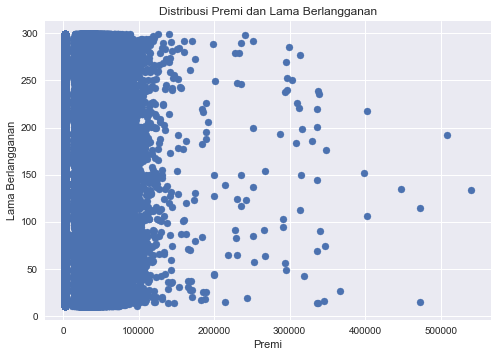

In [19]:
# Scatter Plot based on premi and Lama_Berlangganan
#Plots in matplotlib reside within a figure object, use plt.figure to create new figure 
fig=plt.figure()
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)

#Variable
ax.scatter(df_train['Premi'],df_train['Lama_Berlangganan'])
#Labels and Tit
plt.title('Distribusi Premi dan Lama Berlangganan')
plt.xlabel('Premi')
plt.ylabel('Lama Berlangganan')
plt.show()

#### C. Box-plot

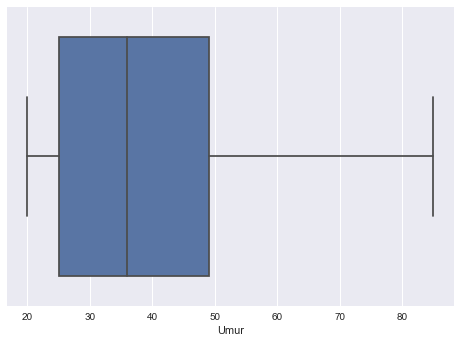

In [20]:
# Box-plot based on Umur
sns.boxplot(x=df_train['Umur']) 
sns.despine()

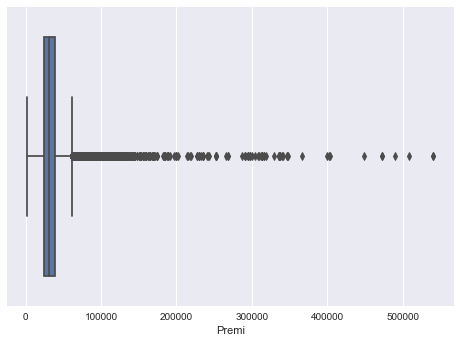

In [21]:
# Box-plot based on Premi
sns.boxplot(x=df_train['Premi']) 
sns.despine()

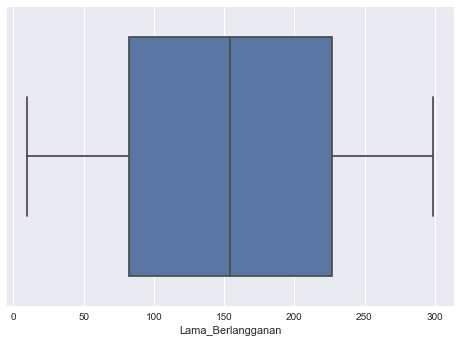

In [22]:
# Box-plot based on Lama_Berlanggan
sns.boxplot(x=df_train['Lama_Berlangganan']) 
sns.despine()

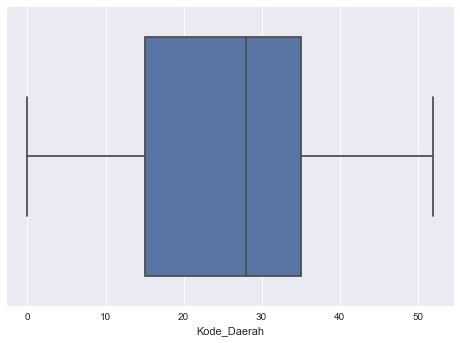

In [23]:
# Box-plot based on Kode_Daerah
sns.boxplot(x=df_train['Kode_Daerah']) 
sns.despine()

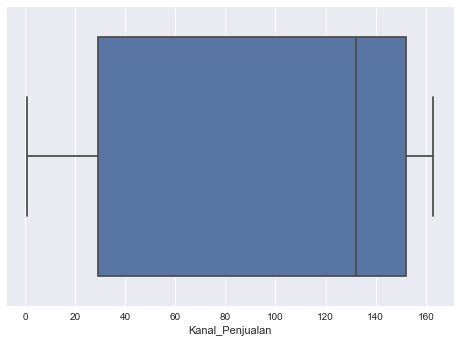

In [24]:
# Box-plot based on Kanal_Penjualan
sns.boxplot(x=df_train['Kanal_Penjualan']) 
sns.despine()

#### D. Heatmap

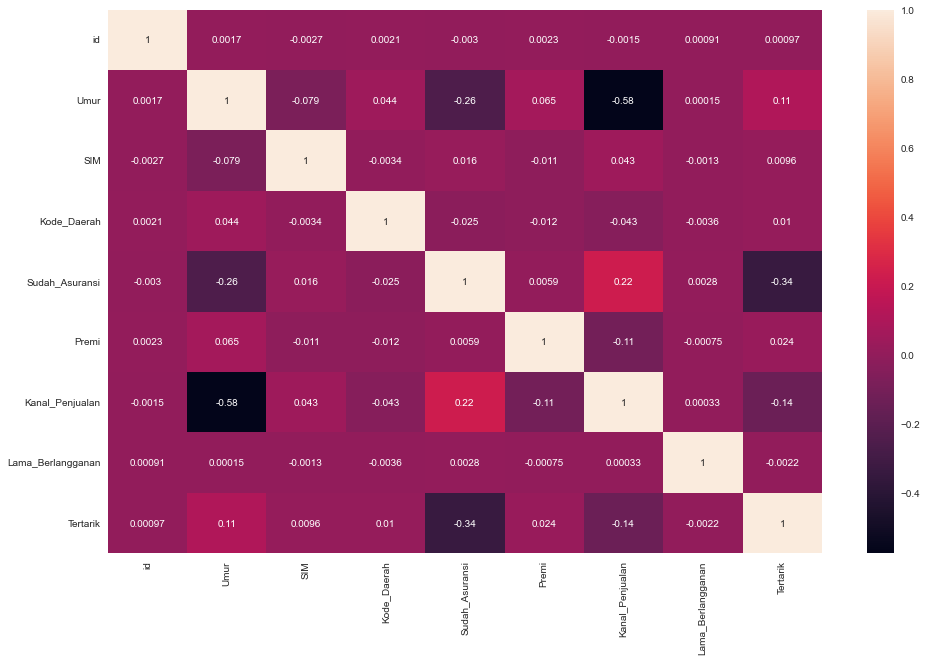

In [25]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

### **3. Korelasi**

In [26]:
df_train.corr()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,1.000000,0.001729,-0.002658,0.002114,-0.003043,0.002292,-0.001500,0.000913,0.000972
Umur,0.001729,1.000000,-0.079467,0.043603,-0.255006,0.064634,-0.577722,0.000147,0.109888
SIM,-0.002658,-0.079467,1.000000,-0.003359,0.016073,-0.011315,0.043426,-0.001266,0.009588
Kode_Daerah,0.002114,0.043603,-0.003359,1.000000,-0.024533,-0.011887,-0.043216,-0.003639,0.010186
Sudah_Asuransi,-0.003043,-0.255006,0.016073,-0.024533,1.000000,0.005903,0.221767,0.002757,-0.340917
Premi,0.002292,0.064634,-0.011315,-0.011887,0.005903,1.000000,-0.112187,-0.000750,0.023770
Kanal_Penjualan,-0.001500,-0.577722,0.043426,-0.043216,0.221767,-0.112187,1.000000,0.000327,-0.140931
Lama_Berlangganan,0.000913,0.000147,-0.001266,-0.003639,0.002757,-0.000750,0.000327,1.000000,-0.002225
Tertarik,0.000972,0.109888,0.009588,0.010186,-0.340917,0.023770,-0.140931,-0.002225,1.000000


### **4. Hasilkan Tabel Frekuensi**

Berdasarkan Umur dan Sudah asuransi

In [27]:
freq = df_train.groupby(['Umur','Sudah_Asuransi']) #Group the Data frame based on Umur and Sudah_Asuransi
freq.size()

Umur  Sudah_Asuransi
20.0  0.0               2506
      1.0               1716
21.0  0.0               5118
      1.0               5903
22.0  0.0               5402
                        ... 
83.0  1.0                  9
84.0  0.0                  1
      1.0                  8
85.0  0.0                  6
      1.0                  2
Length: 132, dtype: int64

Berdasarkan Umur dan Premi

In [28]:
freq = df_train.groupby(['Umur','Premi']) #Group the Data frame based on Umur and Premi
freq.size()

Umur  Premi  
20.0  2630.0     879
      12582.0      1
      12867.0      1
      12947.0      1
      13302.0      1
                ... 
85.0  27057.0      1
      32366.0      1
      34005.0      1
      51045.0      1
      65268.0      1
Length: 192203, dtype: int64

Berdasarkan Umur dan Lama Berlangganan

In [29]:
freq = df_train.groupby(['Umur','Lama_Berlangganan']) #Group the Data frame based on Umur and Lama_Berlangganan
freq.size()

Umur  Lama_Berlangganan
20.0  10.0                 17
      11.0                 12
      12.0                 12
      13.0                 14
      14.0                  6
                           ..
85.0  147.0                 1
      245.0                 1
      279.0                 1
      290.0                 1
      293.0                 1
Length: 17641, dtype: int64

Berdasarkan Umur dan Kendaraan_Rusak

In [30]:
freq = df_train.groupby(['Umur','Kendaraan_Rusak']) #Group the Data frame based on Umur and Kendaraan_Rusak
freq.size()

Umur  Kendaraan_Rusak
20.0  Pernah             2412
      Tidak              1749
21.0  Pernah             4903
      Tidak              6188
22.0  Pernah             4941
                         ... 
83.0  Tidak                 9
84.0  Pernah                1
      Tidak                 7
85.0  Pernah                6
      Tidak                 2
Length: 132, dtype: int64

### **5. Mengelompokkan Variabel untuk Menghitung Hitungan, Rata-rata dan Jumlah**

Berdasarkan Jenis_Kelamin, SIM, Umur_Kendaraan, Kendaraan_Rusak dan Sudah_Asuransi

In [31]:
group = df_train.groupby(['Jenis_Kelamin','SIM','Umur_Kendaraan','Kendaraan_Rusak','Sudah_Asuransi'])
group.describe()

id  \
                                                                   count   
Jenis_Kelamin SIM Umur_Kendaraan Kendaraan_Rusak Sudah_Asuransi            
Pria          0.0 1-2 Tahun      Pernah          0.0               207.0   
                                                 1.0                18.0   
                                 Tidak           0.0                19.0   
                                                 1.0                75.0   
                  > 2 Tahun      Pernah          0.0                21.0   
              1.0 1-2 Tahun      Pernah          0.0             43555.0   
                                                 1.0              2356.0   
                                 Tidak           0.0              4351.0   
                                                 1.0             20334.0   
                  < 1 Tahun      Pernah          0.0             12189.0   
                                                 1.0              1070.0   
                                 Tidak           0.0              2839.0   
                                                 1.0             26514.0   
                  > 2 Tahun      Pernah          0.0              5869.0   
                                                 1.0                12.0   
                                 Tidak           0.0                 1.0   
                                                 1.0                 2.0   
Wanita        0.0 1-2 Tahun      Pernah          0.0                74.0   
                                                 1.0                 6.0   
                                 Tidak           0.0                11.0   
                                                 1.0                32.0   
                  < 1 Tahun      Pernah          0.0                 1.0   
                  > 2 Tahun      Pernah          0.0                 7.0   
              1.0 1-2 Tahun      Pernah          0.0             27006.0   
                                                 1.0              1037.0   
                                 Tidak           0.0              2825.0   
                                                 1.0             14085.0   
                  < 1 Tahun      Pernah          0.0             13481.0   
                                                 1.0              1247.0   
                                 Tidak           0.0              3706.0   
                                                 1.0             34719.0   
                  > 2 Tahun      Pernah          0.0              3344.0   
                                                 1.0                 8.0   
                                 Tidak           0.0                 3.0   
                                                 1.0                 2.0   

                                                                                \
                                                                          mean   
Jenis_Kelamin SIM Umur_Kendaraan Kendaraan_Rusak Sudah_Asuransi                  
Pria          0.0 1-2 Tahun      Pernah          0.0             146765.937198   
                                                 1.0             150037.666667   
                                 Tidak           0.0             167872.473684   
                                                 1.0             150081.186667   
                  > 2 Tahun      Pernah          0.0             136033.428571   
              1.0 1-2 Tahun      Pernah          0.0             142966.042705   
                                                 1.0             140488.799660   
                                 Tidak           0.0             141062.020455   
                                                 1.0             142786.690076   
                  < 1 Tahun      Pernah          0.0             143343.372877   
                                                 1.0             145340.340187   
                                 

## **Pembersihan Data**

### **Hapus nilai duplikat dari variabel dalam Dataframe**

In [32]:
# Find a duplicate rows of train data
duplicate_df_row = df_train[df_train.duplicated()]

print(duplicate_df_row)

Empty DataFrame
Columns: [id, Jenis_Kelamin, Umur, SIM, Kode_Daerah, Sudah_Asuransi, Umur_Kendaraan, Kendaraan_Rusak, Premi, Kanal_Penjualan, Lama_Berlangganan, Tertarik]
Index: []


Hal ini menandakan bahwa train data tidak ada duplicate value

In [33]:
# Find a duplicate rows of test data
duplicate_df_test_row = df_test[df_test.duplicated()]

print(duplicate_df_test_row)

      Jenis_Kelamin  Umur  SIM  Kode_Daerah  Sudah_Asuransi Umur_Kendaraan  \
7859         Wanita    41    1           28               0      1-2 Tahun   
11717        Wanita    35    1           30               1      1-2 Tahun   
31113        Wanita    47    1           28               0      1-2 Tahun   

      Kendaraan_Rusak  Premi  Kanal_Penjualan  Lama_Berlangganan  Tertarik  
7859           Pernah   2630              124                257         0  
11717           Tidak   2630              124                187         0  
31113          Pernah   2630               26                276         1  


Hal ini menandakan bahwa test data ada duplicate value

In [34]:
df_test.drop_duplicates(keep = False, inplace = True)

In [35]:
# Find a duplicate rows of test data
duplicate_df_test_row = df_test[df_test.duplicated()]

print(duplicate_df_test_row)

Empty DataFrame
Columns: [Jenis_Kelamin, Umur, SIM, Kode_Daerah, Sudah_Asuransi, Umur_Kendaraan, Kendaraan_Rusak, Premi, Kanal_Penjualan, Lama_Berlangganan, Tertarik]
Index: []


### **Kenali dan Perlakukan Nilai dan Pencilan yang Hilang**

Hitung nilai hilang

In [36]:
# Identify missing values of dataframe train
df_train.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [37]:
# Identify missing values of dataframe test
df_test.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

Penanganan nilai hilang untuk data train

In [38]:
#Example to impute missing values
df_train.dropna(inplace=True) # Using dropna to drop all NaN values in the Dataframe train

Hasil setelah penanganan nilai hilang untuk data train

In [39]:
# Identify missing values of dataframe train
df_train.isnull().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

Berdasarkan Boxplot sebelumnya, hanya data premi yang memiliki outliers

In [60]:
# IQR for train data
Q1_train= df_train['Premi'].quantile(0.25)
Q3_train = df_train['Premi'].quantile(0.75)
IQR_train = Q3_train - Q1_train
upper_limit_train = Q3_train + 1.5 * IQR_train
lower_limit_train = Q1_train - 1.5 * IQR_train

print("Upper whisker train data: ", upper_limit_train)
print("Lower Whisker train data: ", lower_limit_train)

Upper whisker train data:  60017.0
Lower Whisker train data:  2425.0


In [61]:
# IQR for test data
Q1_test = df_test['Premi'].quantile(0.25)
Q3_test = df_test['Premi'].quantile(0.75)
IQR_test = Q3_test - Q1_test
upper_limit_test = Q3_test + 1.5 * IQR_test
lower_limit_test = Q1_test - 1.5 * IQR_test

print("Upper whisker test data: ", upper_limit_test)
print("Lower Whisker test data: ", lower_limit_test)

Upper whisker test data:  60200.0
Lower Whisker test data:  2320.0


Seperti dibahas sebelumnya, apa pun yang terletak di luar antara Upper whisker dan Lower whisker adalah outlier

Mari kita lihat outlier:

In [42]:
# train data
df_train[(df_train['Premi'] < lower_limit_train) | (df_train['Premi'] > upper_limit_train)]

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
114,115,Wanita,25.0,1.0,41.0,1.0,< 1 Tahun,Tidak,69212.0,152.0,115.0,0
173,174,Pria,24.0,1.0,28.0,1.0,< 1 Tahun,Tidak,63672.0,152.0,98.0,0
266,267,Wanita,58.0,1.0,8.0,0.0,1-2 Tahun,Pernah,72734.0,124.0,61.0,0
309,310,Wanita,45.0,1.0,28.0,1.0,1-2 Tahun,Pernah,76693.0,26.0,56.0,0
631,632,Pria,65.0,1.0,28.0,0.0,> 2 Tahun,Pernah,62438.0,122.0,253.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285610,285611,Wanita,31.0,1.0,28.0,1.0,< 1 Tahun,Tidak,83027.0,152.0,61.0,0
285684,285685,Wanita,20.0,1.0,36.0,0.0,< 1 Tahun,Pernah,99950.0,160.0,14.0,0
285765,285766,Wanita,78.0,1.0,8.0,0.0,1-2 Tahun,Pernah,77615.0,124.0,50.0,0
285776,285777,Pria,22.0,1.0,46.0,0.0,< 1 Tahun,Pernah,72125.0,152.0,154.0,0


In [43]:
# test data
df_test[(df_test['Premi'] < lower_limit_test) | (df_test['Premi'] > upper_limit_test)]

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
6,Wanita,24,1,28,1,< 1 Tahun,Tidak,65801,152,160,0
9,Wanita,43,1,28,0,1-2 Tahun,Pernah,65380,25,41,1
10,Wanita,53,1,28,1,1-2 Tahun,Tidak,80184,26,30,0
62,Wanita,68,1,28,1,1-2 Tahun,Tidak,84824,26,27,0
...,...,...,...,...,...,...,...,...,...,...,...
47283,Wanita,41,1,28,1,1-2 Tahun,Tidak,62636,13,88,0
47426,Pria,53,1,28,1,1-2 Tahun,Tidak,64505,124,73,0
47520,Wanita,43,1,28,0,1-2 Tahun,Pernah,69052,26,95,0
47621,Pria,44,1,28,0,1-2 Tahun,Pernah,86562,26,64,0


Ini adalah outlier yang berada di luar batas atas dan bawah yang dihitung dengan metode IQR.

Untuk menghapus outlier ini dari data:

In [62]:
# train data
df_train = df_train[(df_train['Premi'] > lower_limit_train) & (df_train['Premi'] < upper_limit_train)]

In [63]:
# test data
df_test = df_test[(df_test['Premi'] > lower_limit_test) & (df_test['Premi'] < upper_limit_test)]

Kemudian kita cek apakah ada outlier lagi

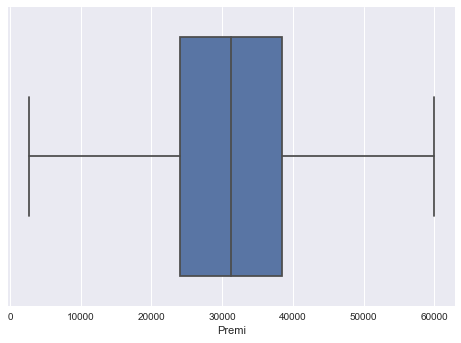

In [64]:
# train data
sns.boxplot(x=df_train['Premi']) 
sns.despine()

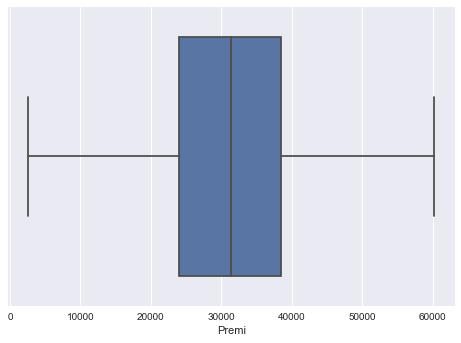

In [65]:
# test data
sns.boxplot(x=df_test['Premi']) 
sns.despine()

### **Hapus kolom yang tidak berguna**

Kita akan menghapus kolom 'id'

In [66]:
#Penghapusan fitur-fitur yang tidak diperlukan di dataframe train
df_train = df_train.drop(['id'], axis = 1)
df_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
5,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
8,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165643 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      165643 non-null  object 
 1   Umur               165643 non-null  float64
 2   SIM                165643 non-null  float64
 3   Kode_Daerah        165643 non-null  float64
 4   Sudah_Asuransi     165643 non-null  float64
 5   Umur_Kendaraan     165643 non-null  object 
 6   Kendaraan_Rusak    165643 non-null  object 
 7   Premi              165643 non-null  float64
 8   Kanal_Penjualan    165643 non-null  float64
 9   Lama_Berlangganan  165643 non-null  float64
 10  Tertarik           165643 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 15.2+ MB


### **Periksa tipe data yang salah**

In [68]:
df_train.dtypes # show the train datatypes

Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

In [69]:
df_test.dtypes # show the test datatypes

Jenis_Kelamin        object
Umur                  int64
SIM                   int64
Kode_Daerah           int64
Sudah_Asuransi        int64
Umur_Kendaraan       object
Kendaraan_Rusak      object
Premi                 int64
Kanal_Penjualan       int64
Lama_Berlangganan     int64
Tertarik              int64
dtype: object

### **Ubah Tipe Data Kolom Umur, Premi, Kanal_Penjualan, Lama_Berlangganan dan Kode_Daerah menjadi int**

In [70]:
# convert train data type of Umur, Premi, Kanal_Penjualan, Lama_Berlangganan and Kode_Daerah column
# into integer
df_train.Umur = df_train.Umur.astype(int)
df_train.Premi = df_train.Premi.astype(int)
df_train.Kanal_Penjualan = df_train.Kanal_Penjualan.astype(int)
df_train.Lama_Berlangganan = df_train.Lama_Berlangganan.astype(int)
df_train.Kode_Daerah = df_train.Kode_Daerah.astype(int)

# show the datatypes
print(df_train.dtypes)

Jenis_Kelamin         object
Umur                   int32
SIM                  float64
Kode_Daerah            int32
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                  int32
Kanal_Penjualan        int32
Lama_Berlangganan      int32
Tertarik               int64
dtype: object


In [71]:
# convert test data type of Umur, Premi, Kanal_Penjualan, Lama_Berlangganan and Kode_Daerah column
# into integer
df_test.Umur = df_test.Umur.astype(int)
df_test.Premi = df_test.Premi.astype(int)
df_test.Kanal_Penjualan = df_test.Kanal_Penjualan.astype(int)
df_test.Lama_Berlangganan = df_test.Lama_Berlangganan.astype(int)
df_test.Kode_Daerah = df_test.Kode_Daerah.astype(int)

# show the datatypes
print(df_test.dtypes)

Jenis_Kelamin        object
Umur                  int32
SIM                   int64
Kode_Daerah           int32
Sudah_Asuransi        int64
Umur_Kendaraan       object
Kendaraan_Rusak      object
Premi                 int32
Kanal_Penjualan       int32
Lama_Berlangganan     int32
Tertarik              int64
dtype: object


### **Encode Data bertipe String**

In [72]:
# Encode string train data
df_train['Jenis_Kelamin'] = df_train['Jenis_Kelamin'].replace(['Wanita'], 2)
df_train['Jenis_Kelamin'] = df_train['Jenis_Kelamin'].replace(['Pria'], 1)

df_train['Umur_Kendaraan'] = df_train['Umur_Kendaraan'].replace(['< 1 Tahun'], 1)
df_train['Umur_Kendaraan'] = df_train['Umur_Kendaraan'].replace(['1-2 Tahun'], 2)
df_train['Umur_Kendaraan'] = df_train['Umur_Kendaraan'].replace(['> 2 Tahun'], 3)

df_train['Kendaraan_Rusak'] = df_train['Kendaraan_Rusak'].replace(['Tidak'], 0)
df_train['Kendaraan_Rusak'] = df_train['Kendaraan_Rusak'].replace(['Pernah'], 1)

df_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,2,30,1.0,33,1.0,1,0,28029,152,97,0
1,1,48,1.0,39,0.0,3,1,25800,29,158,0
3,2,58,1.0,48,0.0,2,0,2630,124,63,0
5,1,21,1.0,35,1.0,1,0,22735,152,171,0
8,2,20,1.0,8,1.0,1,0,30786,160,31,0


In [73]:
# Encode string test data
df_test['Jenis_Kelamin'] = df_test['Jenis_Kelamin'].replace(['Wanita'], 2)
df_test['Jenis_Kelamin'] = df_test['Jenis_Kelamin'].replace(['Pria'], 1)

df_test['Umur_Kendaraan'] = df_test['Umur_Kendaraan'].replace(['< 1 Tahun'], 1)
df_test['Umur_Kendaraan'] = df_test['Umur_Kendaraan'].replace(['1-2 Tahun'], 2)
df_test['Umur_Kendaraan'] = df_test['Umur_Kendaraan'].replace(['> 2 Tahun'], 3)

df_test['Kendaraan_Rusak'] = df_test['Kendaraan_Rusak'].replace(['Tidak'], 0)
df_test['Kendaraan_Rusak'] = df_test['Kendaraan_Rusak'].replace(['Pernah'], 1)

df_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,2,49,1,8,0,2,1,46963,26,145,0
1,1,22,1,47,1,1,0,39624,152,241,0
3,1,46,1,8,1,2,0,36266,124,34,0
4,1,35,1,23,0,2,1,26963,152,229,0
5,1,26,1,28,1,1,0,42721,152,198,0


### **Mengubah data kategorikal menjadi tipe data objek**

In [74]:
# Converting categorical train data into object data types
df_train=df_train.astype({'Jenis_Kelamin':object, 'SIM': object, 'Sudah_Asuransi': object, 'Kendaraan_Rusak': object,'Tertarik': object, 'Umur_Kendaraan':object})
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165643 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Jenis_Kelamin      165643 non-null  object
 1   Umur               165643 non-null  int32 
 2   SIM                165643 non-null  object
 3   Kode_Daerah        165643 non-null  int32 
 4   Sudah_Asuransi     165643 non-null  object
 5   Umur_Kendaraan     165643 non-null  object
 6   Kendaraan_Rusak    165643 non-null  object
 7   Premi              165643 non-null  int32 
 8   Kanal_Penjualan    165643 non-null  int32 
 9   Lama_Berlangganan  165643 non-null  int32 
 10  Tertarik           165643 non-null  object
dtypes: int32(5), object(6)
memory usage: 12.0+ MB


In [75]:
# Converting categorical test data into object data types
df_test=df_test.astype({'Jenis_Kelamin':object, 'SIM': object, 'Sudah_Asuransi': object, 'Kendaraan_Rusak': object,'Tertarik': object, 'Umur_Kendaraan':object})
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46114 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      46114 non-null  object
 1   Umur               46114 non-null  int32 
 2   SIM                46114 non-null  object
 3   Kode_Daerah        46114 non-null  int32 
 4   Sudah_Asuransi     46114 non-null  object
 5   Umur_Kendaraan     46114 non-null  object
 6   Kendaraan_Rusak    46114 non-null  object
 7   Premi              46114 non-null  int32 
 8   Kanal_Penjualan    46114 non-null  int32 
 9   Lama_Berlangganan  46114 non-null  int32 
 10  Tertarik           46114 non-null  object
dtypes: int32(5), object(6)
memory usage: 3.3+ MB


# **Klasifikasi Data**

Kami akan mencoba membangun model menggunakan algoritma Decision Tree. Setelah membangun model, kami akan mengevaluasinya. Kami kemudian akan mencoba mengoptimalkan model kami dengan menyetel hyperparameter model dengan menggunakan GridSearch. Terakhir, kami akan menyimpan hasil prediksi dari dataset kami menggunakan data test.

## **Distribusi Kelas**

Hal penting lainnya yang harus dipastikan sebelum memasukkan data kita ke dalam model adalah distribusi kelas data. Dalam kasus kami di mana kelas yang diharapkan dibagi menjadi dua hasil, 'tertarik' dan 'tidak tertarik', distribusi kelas 50:50 dapat dianggap ideal.

In [77]:
df_train['Tertarik'].value_counts()

0    145637
1     20006
Name: Tertarik, dtype: int64

Seperti yang kita lihat distribusi kelas kita tidak persis 50:50 tapi tidak mengapa

## **Skala Data Numerik**

Selanjutnya, kami akan menskalakan data numerik kami untuk menghindari kehadiran outlier yang dapat secara signifikan mempengaruhi model kami. Menggunakan fungsi StandardScaler() dari sklearn, kita dapat menskalakan setiap kolom kita yang berisi data numerik. Penskalaan akan dilakukan dengan menggunakan rumus di bawah ini:

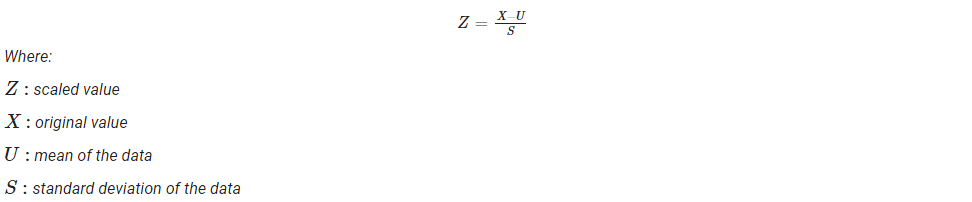

In [78]:
# Copying original train dataframe
df_ready = df_train.copy()

scaler = StandardScaler()
num_cols = ['Umur', 'Kode_Daerah', 'Premi', 'Lama_Berlangganan','Kanal_Penjualan']
df_ready[num_cols] = scaler.fit_transform(df_train[num_cols])

df_ready.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,2,-0.559295,1.0,0.489047,1.0,1,0,-0.071293,0.726136,-0.683137,0
1,1,0.606194,1.0,0.938318,0.0,3,1,-0.223896,-1.555503,0.044366,0
3,2,1.253688,1.0,1.612225,0.0,2,0,-1.810170,0.206738,-1.088630,0
5,1,-1.142040,1.0,0.638804,1.0,1,0,-0.433733,0.726136,0.199407,0
8,2,-1.206789,1.0,-1.382917,1.0,1,0,0.117458,0.874535,-1.470270,0


In [79]:
# Copying original test dataframe
df_test_ready = df_test.copy()
df_test_ready[num_cols] = scaler.fit_transform(df_test[num_cols])

df_test_ready.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,2,0.672446,1,-1.381777,0,2,1,1.217820,-1.611569,-0.111723,0
1,1,-1.074447,1,1.549016,1,1,0,0.716033,0.725526,1.036265,0
3,1,0.478346,1,-1.381777,1,2,0,0.486437,0.206171,-1.439084,0
4,1,-0.233351,1,-0.254549,0,2,1,-0.149634,0.725526,0.892767,0
5,1,-0.815648,1,0.121194,1,1,0,0.927783,0.725526,0.522062,0


## **Pisahkan Dataset untuk Pelatihan dan Pengujian**

Untuk menyelesaikan langkah pra-pemrosesan data kami, kami akan membagi data kami menjadi dua kumpulan data, pelatihan dan pengujian. Dalam hal ini kami akan membagi data dengan rasio 80:20 untuk pelatihan dan pengujian masing-masing. Ini akan menghasilkan data pelatihan kami memiliki 132514 baris dan 33129 baris untuk data pengujian.

In [80]:
# Select Features
feature = df_ready.drop('Tertarik', axis=1)

# Select Target
target = df_ready['Tertarik']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Bentuk dari fitur training:', X_train.shape)
print('Bentuk dari fitur testing:', X_test.shape)
print('Bentuk dari label training:', y_train.shape)
print('Bentuk dari label testing:', y_test.shape)

Bentuk dari fitur training: (132514, 10)
Bentuk dari fitur testing: (33129, 10)
Bentuk dari label training: (132514,)
Bentuk dari label testing: (33129,)


## **Pemodelan**

Setelah memastikan data kami baik dan siap, kami dapat melanjutkan untuk membangun model kami. Pada langkah ini kita akan membuat model dasar menggunakan parameter default yang ditetapkan oleh sklearn.

Untuk mengevaluasi model kami, kami akan menggunakan confusion matrix sebagai dasar evaluasi kami.

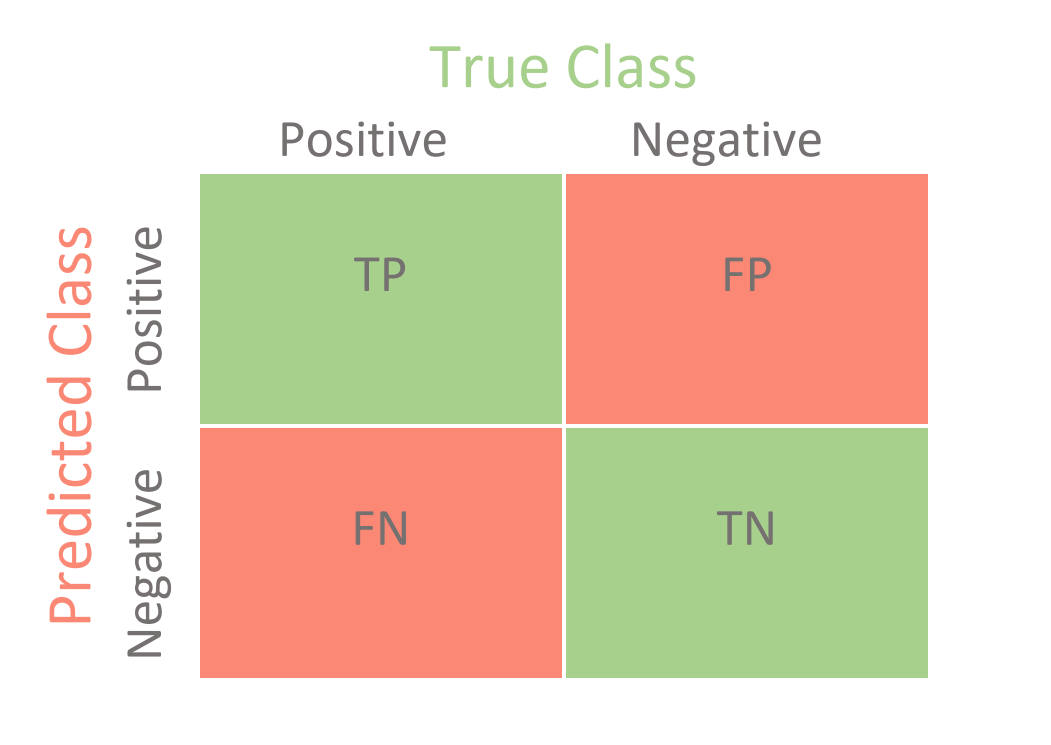

dimana: TP = True Positive; FP = False Positive; TN = True Negative; FN = False Negative.

Kami akan menggunakan 6 metrik di bawah ini untuk mengevaluasi model:

- Akurasi: proporsi hasil yang benar di antara jumlah total kasus yang diperiksa.

 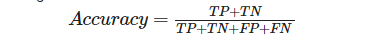

- Precision: perbandingan antara True Positive (TP) dengan banyaknya data yang diprediksi positif.

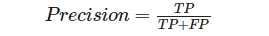

- Recall: perbandingan antara True Positive (TP) dengan banyaknya data yang sebenarnya positif.

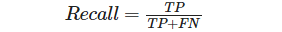

- Skor F1: harmonic mean dari precision dan recall. Nilai terbaik F1-Score adalah 1.0 dan nilai terburuknya adalah 0. Secara representasi, jika F1-Score punya skor yang baik mengindikasikan bahwa model klasifikasi kita punya precision dan recall yang baik.

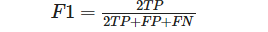

- Skor Cohen Kappa: Cohen's kappa mengukur kesepakatan antara dua penilai yang masing-masing mengklasifikasikan N item ke dalam kategori C yang saling eksklusif.

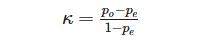

di mana Po adalah probabilitas empiris kesepakatan pada label yang ditetapkan untuk setiap sampel (rasio kesepakatan yang diamati), dan Pe adalah kesepakatan yang diharapkan ketika kedua annotator menetapkan label secara acak. Pe diperkirakan menggunakan prior empiris per-annotator di atas label kelas.

- Area Under Curve (AUC): menunjukkan seberapa baik probabilitas dari kelas positif dipisahkan dari kelas negatif

Dalam hal ini kami ingin fokus pada nilai recall model kami karena dalam masalah kami, kami harus mencoba untuk memprediksi sebanyak mungkin positif aktual. Karena kesalahan klasifikasi pelanggan yang sebenarnya ingin melakukan pembelian dapat berarti kehilangan kesempatan/pendapatan.

Di bawah ini kami akan mendefinisikan fungsi pembantu untuk mengevaluasi setiap model terlatih dan dengan metrik yang disebutkan di atas dan menyimpan skor ke variabel.

In [81]:
def evaluate_model(model, x_test, y_test):

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

## **Decision Tree**

Pohon keputusan adalah diagram berbentuk pohon yang digunakan untuk menentukan suatu tindakan. Setiap cabang pohon mewakili kemungkinan keputusan, kejadian atau reaksi.

#### Keuntungan:

- Ini dapat digunakan untuk tugas regresi dan klasifikasi dan mudah untuk melihat kepentingan relatif yang diberikannya pada fitur input.
- Ini juga dianggap sebagai algoritme yang sangat praktis dan mudah digunakan, karena parameter hiper defaultnya sering kali menghasilkan hasil prediksi yang baik.

#### Kekurangan:

- Banyak pohon dapat membuat algoritma menjadi lambat dan tidak efektif untuk prediksi waktu nyata. Prediksi yang lebih akurat membutuhkan lebih banyak pohon, yang menghasilkan model yang lebih lambat.
- Ini adalah alat pemodelan prediktif dan bukan alat deskriptif.

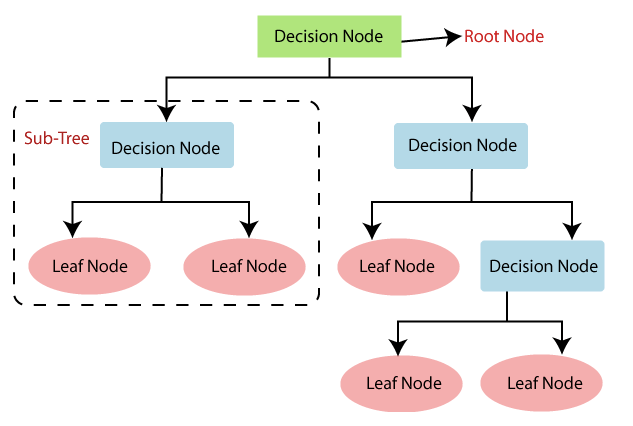

## **Membangun Model**

Setelah memahami cara kerja model, mari kita coba melatih model kita dengan menggunakan dataset pelatihan yang kita miliki sebelumnya. Di bawah ini adalah Decision Tree, kemudian kami akan mengevaluasi model dengan fungsi pembantu sebelumnya.

In [82]:
# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train.astype(int), y_train.astype(int))

DecisionTreeClassifier(random_state=0)

## **Representasi Decision Tree secara Teks**

In [94]:
text_representation = tree.export_text(dtc)
print(text_representation)

|--- feature_6 <= 0.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_5 <= 1.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- feature_1 <= -0.50
|   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |--- feature_7 <= -0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_7 >  -0.50
|   |   |   |   |   |   |   |--- feature_9 <= -0.50
|   |   |   |   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_3 <= -0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_8 <= -0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_8 >  -0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_3 >  -0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_8 <= -0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_8 >  -0.50
|   | 

## **Visualisasi Decision Tree**

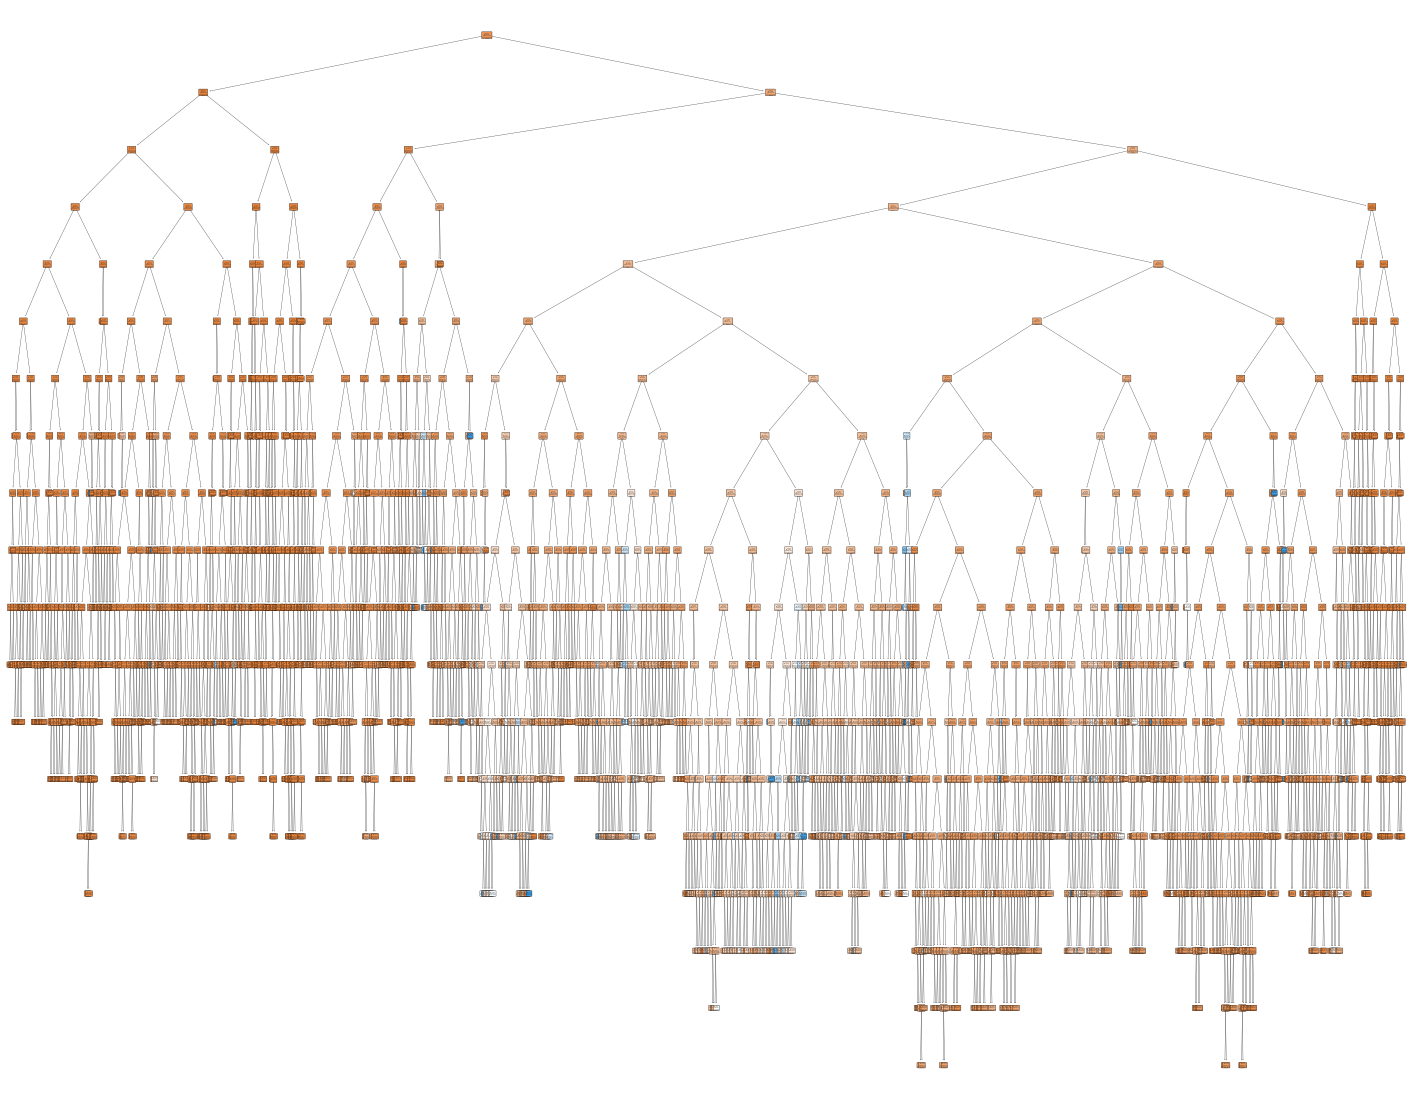

In [83]:
# from sklearn.tree import plot_tree
feature_names = str(df_ready.columns[:10])
target_names = str(df_ready['Tertarik'])

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, 
                   feature_names= feature_names,  
                   class_names= target_names,
                   filled=True,  
                   rounded = True)

## **Evaluasi Model**

In [84]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test.astype(int), y_test.astype(int))

# Print result
print('Akurasi:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('Skor F1:', dtc_eval['f1'])
print('Skor Cohens Kappa:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])

Akurasi: 0.8799843037821848
Precision: 0.3805970149253731
Recall: 0.01293103448275862
Skor F1: 0.02501226091221187
Skor Cohens Kappa: 0.01732402876180017
Area Under Curve: 0.8285577752749561


Kita bisa melakukan visualiasi confusion matrix dengan kode dibawah

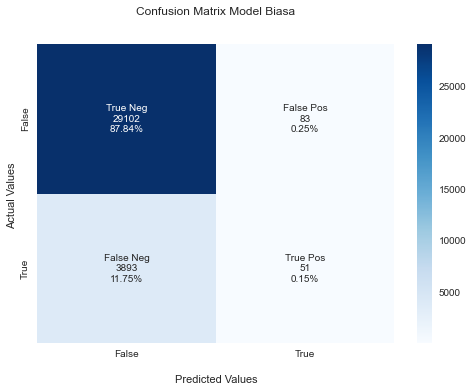

In [85]:
# confusion matrix plot
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in dtc_eval['cm'].flatten()]
group_percentages = ["{0:.2%}".format(value) for value in dtc_eval['cm'].flatten()/np.sum(dtc_eval['cm'])]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(dtc_eval['cm'], annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix Model Biasa\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## **Visualisasi Evaluasi Model**

kita akan membuat dua grafik, pertama adalah diagram batang yang dikelompokkan untuk menampilkan nilai akurasi, presisi, recall, f1, dan skor kappa model kami, dan kedua diagram garis untuk menunjukkan AUC semua model kami.

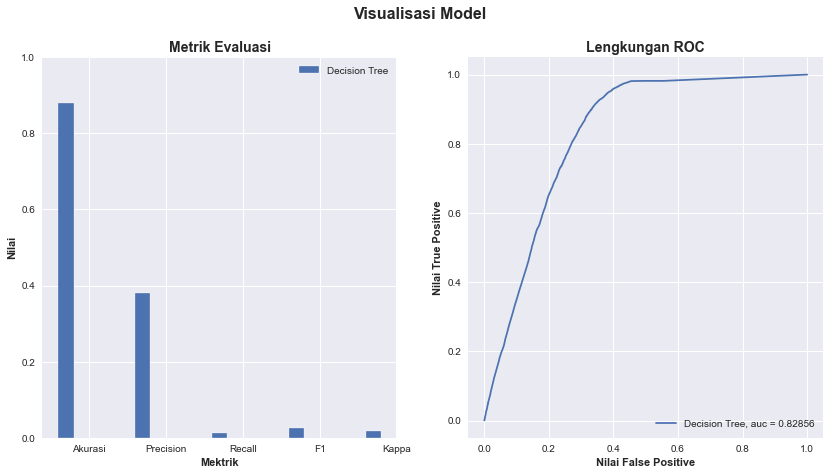

In [86]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Visualisasi Model', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')

## Configure x and y axis
ax1.set_xlabel('Mektrik', fontweight='bold')
labels = ['Akurasi', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Nilai', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Metrik Evaluasi', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('Nilai False Positive', fontweight='bold')
ax2.set_ylabel('Nilai True Positive', fontweight='bold')

## Create legend & title
ax2.set_title('Lengkungan ROC', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

## **Optimasi Model**

kami akan mencoba mengoptimalkan model decision tree kami dengan menyetel parameter hyper yang tersedia dari lib scikit-learn. Setelah menemukan parameter optimal, kami kemudian akan mengevaluasi model baru kami dengan membandingkannya dengan model base line kami sebelumnya.

#### **Menyetel Hyperparameter dengan GridSearchCV**

Kami akan menggunakan fungsionalitas GridSearchCV dari sklearn untuk menemukan parameter optimal untuk model kami. Kami akan menyediakan model dasar kami (bernama dt_grids), metode penilaian (dalam kasus kami, kami akan menggunakan recall seperti yang dijelaskan sebelumnya). Fungsi GridSearchCV kemudian akan melakukan iterasi melalui setiap kombinasi parameter untuk menemukan parameter penilaian terbaik.

Fungsi ini juga memungkinkan kita untuk menggunakan validasi silang untuk melatih model kita, di mana pada setiap iterasi data kita akan dibagi menjadi 5 kali lipat (jumlahnya dapat disesuaikan dari parameter). Model kemudian akan dilatih pada 4/5 lipatan data meninggalkan lipatan terakhir sebagai data validasi, proses ini akan diulang sebanyak 5 kali hingga semua lipatan kita digunakan sebagai data validasi.

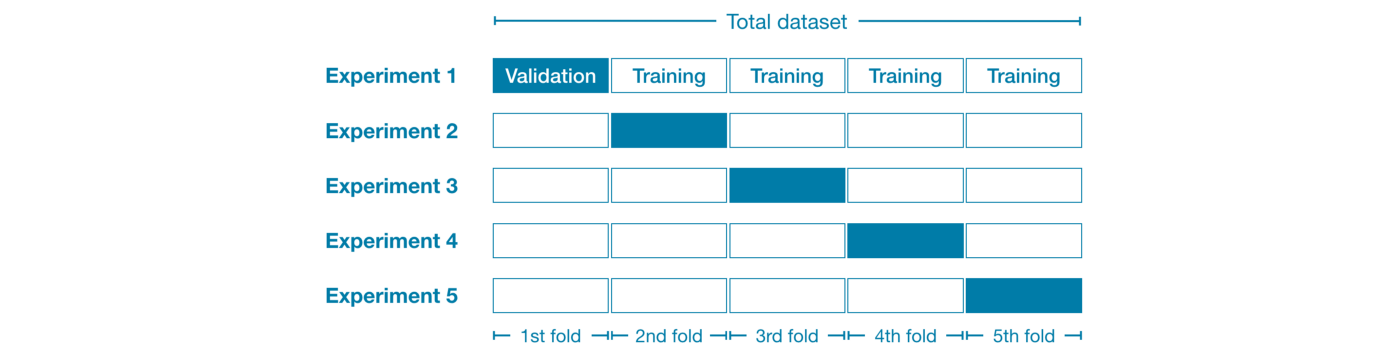

Untuk melihat hasil kombinasi parameter mana yang paling berhasil, kita dapat mengakses atribut best_params_ dari objek pencarian grid kita.

In [87]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [20, 40, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
}

# Create a base model
dt_grids = tree.DecisionTreeClassifier(random_state=0)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=dt_grids, param_grid=param_grid, scoring='recall',
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train.astype(int), y_train.astype(int))

print('Criterion Terbaik:', grid_search.best_estimator_.get_params()['criterion'])
print('max_depth Terbaik:', grid_search.best_estimator_.get_params()['max_depth'])
print('max_features Terbaik:', grid_search.best_estimator_.get_params()['max_features'])
print('min_samples_leaf Terbaik:', grid_search.best_estimator_.get_params()['min_samples_leaf'])
print('min_samples_split Terbaik:', grid_search.best_estimator_.get_params()['min_samples_split'])

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Criterion Terbaik: gini
max_depth Terbaik: 20
max_features Terbaik: 3
min_samples_leaf Terbaik: 3
min_samples_split Terbaik: 10


Kemudian kita membuat model baru dengan hyperparameter yang telah kita dapat

In [88]:
improved_dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=20,
            max_features=3,min_samples_leaf=3, min_samples_split=10, random_state=0)
improved_dt.fit(X_train.astype(int), y_train.astype(int))

DecisionTreeClassifier(max_depth=20, max_features=3, min_samples_leaf=3,
                       min_samples_split=10, random_state=0)

## **Mengevaluasi Model yang Dioptimalkan**

Kami akan menghitung 6 metrik evaluasi menggunakan fungsi pembantu kami untuk membandingkannya dengan model dasar kami pada langkah berikutnya.

In [89]:
# Evaluate Model
best_grid_eval = evaluate_model(improved_dt, X_test.astype(int), y_test.astype(int))

# Print result
print('Akurasi:', best_grid_eval['acc'])
print('Precision:', best_grid_eval['prec'])
print('Recall:', best_grid_eval['rec'])
print('Skor F1:', best_grid_eval['f1'])
print('Skor Cohens Kappa:', best_grid_eval['kappa'])
print('Area Under Curve:', best_grid_eval['auc'])

Akurasi: 0.880437079296085
Precision: 0.4260869565217391
Recall: 0.01242393509127789
Skor F1: 0.024143877802414386
Skor Cohens Kappa: 0.017516178878553057
Area Under Curve: 0.8304450893978783


Kita bisa melakukan visualiasi confusion matrix dengan kode dibawah

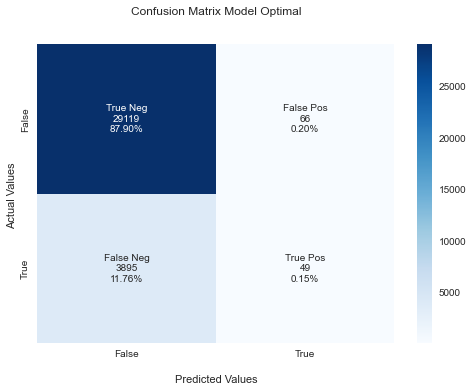

In [90]:
# confusion matrix plot
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in best_grid_eval['cm'].flatten()]
group_percentages = ["{0:.2%}".format(value) for value in best_grid_eval['cm'].flatten()/np.sum(best_grid_eval['cm'])]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(best_grid_eval['cm'], annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix Model Optimal\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## **Perbandingan Model**

Kode di bawah ini akan menggambar plot yang sama seperti sebelumnya hanya dengan decision tree asli kami dan versi yang dioptimalkan. Ini juga akan mencetak perubahan pada setiap metrik evaluasi untuk membantu kami melihat apakah model kami yang dioptimalkan bekerja lebih baik daripada yang asli.

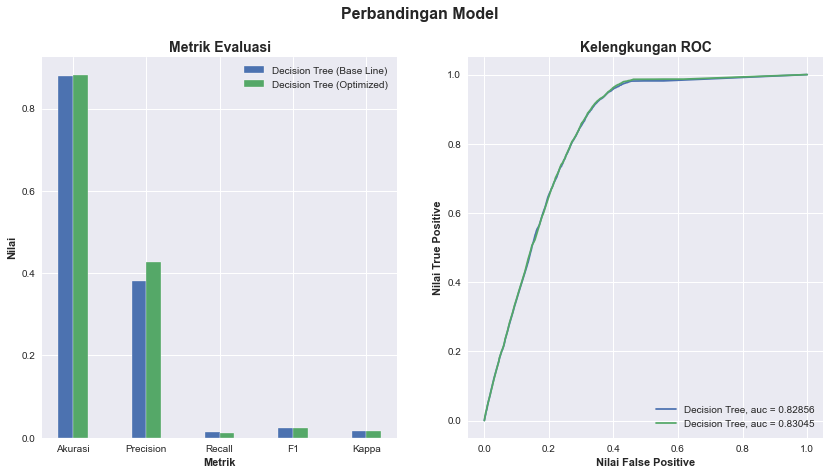

Akurasi berubah sebanyak 0.05%.
Precision berubah sebanyak 11.95%.
Recall berubah sebanyak -3.92%.
Nilai F1 berubah sebanyak -3.47%.
Nilai Kappa berubah sebanyak 1.11%.
AUC berubah sebanyak 0.23%.


In [91]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Perbandingan Model', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dt_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
best_grid_score = [best_grid_eval['acc'], best_grid_eval['prec'], best_grid_eval['rec'], best_grid_eval['f1'], best_grid_eval['kappa']]

## Set position of bar on X axis
d1 = np.arange(len(dt_score))
d2 = [x + barWidth for x in d1]

## Make the plot
ax1.bar(d1, dt_score, width=barWidth, edgecolor='white', label='Decision Tree (Base Line)')
ax1.bar(d2, best_grid_score, width=barWidth, edgecolor='white', label='Decision Tree (Optimized)')

## Add xticks on the middle of the group bars
ax1.set_xlabel('Metrik', fontweight='bold')
labels = ['Akurasi', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 0.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Nilai', fontweight='bold')
# ax1.set_ylim(0, 1)

## Create legend & Show graphic
ax1.set_title('Metrik Evaluasi', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(best_grid_eval['fpr'], best_grid_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(best_grid_eval['auc']))

ax2.set_title('Kelengkungan ROC', fontsize=14, fontweight='bold')
ax2.set_xlabel('Nilai False Positive', fontweight='bold')
ax2.set_ylabel('Nilai True Positive', fontweight='bold')
ax2.legend(loc=4)

plt.show()

print('Akurasi berubah sebanyak {:0.2f}%.'.format(100 * ((best_grid_eval['acc'] - dtc_eval['acc']) / dtc_eval['acc'])))
print('Precision berubah sebanyak {:0.2f}%.'.format(100 * ((best_grid_eval['prec'] - dtc_eval['prec']) / dtc_eval['prec'])))
print('Recall berubah sebanyak {:0.2f}%.'.format(100 * ((best_grid_eval['rec'] - dtc_eval['rec']) / dtc_eval['rec'])))
print('Nilai F1 berubah sebanyak {:0.2f}%.'.format(100 * ((best_grid_eval['f1'] - dtc_eval['f1']) / dtc_eval['f1'])))
print('Nilai Kappa berubah sebanyak {:0.2f}%.'.format(100 * ((best_grid_eval['kappa'] - dtc_eval['kappa']) / dtc_eval['kappa'])))
print('AUC berubah sebanyak {:0.2f}%.'.format(100 * ((best_grid_eval['auc'] - dtc_eval['auc']) / dtc_eval['auc'])))

## **Membuat Prediksi**

Pada langkah ini kami akan memprediksi hasil yang diharapkan dari semua baris dari dataset pengujian kami yang lain menggunakan model Decision Tree.

In [92]:
# with base line dtc
# df_test_ready = df_test_ready.drop('prediksi_tertarik', axis=1)
df_predict_base_line = df_test_ready.copy()
feature = df_predict_base_line.drop('Tertarik', axis=1)

df_predict_base_line['prediksi_tertarik'] = dtc.predict(feature)

# Save new dataframe into csv file
df_predict_base_line.to_csv('prediksi_tertarik_baseline_model.csv', index=False)

df_predict_base_line.head(10)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,prediksi_tertarik
0,2,0.672446,1,-1.381777,0,2,1,1.217820,-1.611569,-0.111723,0,0
1,1,-1.074447,1,1.549016,1,1,0,0.716033,0.725526,1.036265,0,0
3,1,0.478346,1,-1.381777,1,2,0,0.486437,0.206171,-1.439084,0,0
4,1,-0.233351,1,-0.254549,0,2,1,-0.149634,0.725526,0.892767,0,0
5,1,-0.815648,1,0.121194,1,1,0,0.927783,0.725526,0.522062,0,0
7,2,0.090148,1,0.121194,0,2,1,0.125088,-1.611569,-0.900965,0,0
8,1,-1.009747,1,-0.855738,1,1,0,0.219716,0.725526,0.773184,0,0
11,1,-0.686249,1,1.473868,1,1,0,-0.238928,0.725526,-0.255221,0,0
12,1,-0.945048,1,-0.404846,1,1,0,0.455738,0.725526,-1.427126,0,0
13,2,-1.139147,1,-0.329698,1,1,0,0.017264,0.873912,1.131931,0,0


In [93]:
# with improvedDTC
# df_test_ready = df_test_ready.drop('prediksi_tertarik', axis=1)
df_predict_improve = df_test_ready.copy()
feature = df_predict_improve.drop('Tertarik', axis=1)

df_predict_improve['prediksi_tertarik'] = improved_dt.predict(feature)

# Save new dataframe into csv file
df_predict_improve.to_csv('prediksi_tertarik_improved_model.csv', index=False)

df_predict_improve.head(10)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,prediksi_tertarik
0,2,0.672446,1,-1.381777,0,2,1,1.217820,-1.611569,-0.111723,0,0
1,1,-1.074447,1,1.549016,1,1,0,0.716033,0.725526,1.036265,0,0
3,1,0.478346,1,-1.381777,1,2,0,0.486437,0.206171,-1.439084,0,0
4,1,-0.233351,1,-0.254549,0,2,1,-0.149634,0.725526,0.892767,0,0
5,1,-0.815648,1,0.121194,1,1,0,0.927783,0.725526,0.522062,0,0
7,2,0.090148,1,0.121194,0,2,1,0.125088,-1.611569,-0.900965,0,0
8,1,-1.009747,1,-0.855738,1,1,0,0.219716,0.725526,0.773184,0,0
11,1,-0.686249,1,1.473868,1,1,0,-0.238928,0.725526,-0.255221,0,0
12,1,-0.945048,1,-0.404846,1,1,0,0.455738,0.725526,-1.427126,0,0
13,2,-1.139147,1,-0.329698,1,1,0,0.017264,0.873912,1.131931,0,0


# **Kesimpulan**

Untuk model sederhana kita dapat melihat bahwa model kita melakukan klasifikasi data dengan kurang baik. Masih ada beberapa kelemahan pada model kami seperti recall, presisi, F1 dan kappa masih cenderung kecil. Hasilnya pun tidak jauh berbeda setelah mengoptimalkan model menggunakan GridSearchCV yang berarti kita mencapai batas kita dengan model ini. Untuk meningkatkan kinerja kami, kami dapat mencoba melihat ke dalam algoritma lain seperti GradientBoostingClassifier atau mencari model klasifikasi lain selain decision tree.

# **Link GitHub**

File csv untuk train dan test dan juga hasil prediksi terdapat pada link GitHub dibawah

https://github.com/dioapw/school-project-clustering-classification

# **Referensi**

- https://www.projectpro.io/recipes/optimize-hyper-parameters-of-decisiontree-model-using-grid-search-in-python
- https://medium.com/analytics-vidhya/building-classification-model-with-python-9bdfc13faa4b
- https://medium.com/codex/building-and-visualizing-decision-tree-in-python-2cfaafd8e1bb
- https://stevkarta.medium.com/membicarakan-precision-recall-dan-f1-score-e96d81910354
- https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/